### Polynomial Regression:

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

df = pd.read_csv('./nyc-flights.csv')
df = df.drop(['tailnum','year'], axis=1)

encoder = preprocessing.OrdinalEncoder()
df[['carrier']] = encoder.fit_transform(df[['carrier']])
df[['origin']] = encoder.fit_transform(df[['origin']])
df[['dest']] = encoder.fit_transform(df[['dest']])
indexNames = df[ df['arr_delay'] <  0].index
df.drop(indexNames , inplace=True)
df

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute
1,5,7,1657,-3,2104,10,4.0,329,1.0,89.0,216,1598,16,57
2,12,8,859,-1,1238,11,4.0,422,1.0,49.0,376,2475,8,59
5,1,1,1817,-3,2008,3,1.0,353,2.0,67.0,138,733,18,17
6,12,9,1259,14,1617,22,14.0,1428,0.0,41.0,240,1411,12,59
7,8,13,1920,85,2032,71,3.0,1407,1.0,42.0,48,228,19,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32726,2,4,1558,-2,1854,4,4.0,1331,1.0,29.0,238,1626,15,58
32728,7,13,1923,18,2124,18,0.0,3525,1.0,67.0,107,740,19,23
32729,1,28,706,36,909,22,5.0,4419,0.0,45.0,105,645,7,6
32731,7,7,812,-3,1043,8,4.0,1429,1.0,48.0,286,2248,8,12


In [4]:
from sklearn.model_selection import train_test_split

y = df['arr_delay']
X = df.drop(columns=['arr_delay'])

sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
y_scaled_array = sc.fit_transform(np.asarray(y).reshape(-1,1))
# split 80 (train): 20 (test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled_array, random_state=29, test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
import numpy as np

# polynomial regression
for deg in range(1, 7):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # learn from training data and memorize model coefficients
    x_train_poly = poly.fit_transform(X_train)
    polyReg = LinearRegression().fit(x_train_poly, y_train) 
    y_train_predicted = polyReg.predict(x_train_poly)
    print(f'Training MSE error for degree {deg} is: {round(mean_squared_error(y_train, y_train_predicted),4)}')
    print(f'Training R2 score for degree {deg} is: {round(r2_score(y_train, y_train_predicted),4)}')

    # use testing set to get standardized data
    x_test_poly = poly.transform(X_test)
    y_test_predicted = polyReg.predict(x_test_poly)
    print(f'Testing MSE error for degree {deg} is: {round(mean_squared_error(y_test, y_test_predicted),4)}')
    print(f'Testing R2 score for degree {deg} is: {round(r2_score(y_test, y_test_predicted),4)}')
    print('\n')    


Training MSE error for degree 1 is: 0.0002
Training R2 score for degree 1 is: 0.8932
Testing MSE error for degree 1 is: 0.0002
Testing R2 score for degree 1 is: 0.9014


Training MSE error for degree 2 is: 0.0001
Training R2 score for degree 2 is: 0.9231
Testing MSE error for degree 2 is: 0.0001
Testing R2 score for degree 2 is: 0.9269


Training MSE error for degree 3 is: 0.0001
Training R2 score for degree 3 is: 0.9503
Testing MSE error for degree 3 is: 0.0003
Testing R2 score for degree 3 is: 0.8394


Training MSE error for degree 4 is: 0.0001
Training R2 score for degree 4 is: 0.9682
Testing MSE error for degree 4 is: 0.0027
Testing R2 score for degree 4 is: -0.4609




month
Training MSE error for degree 1 is: 0.0017
Training R2 score for degree 1 is: 0.0002
Testing MSE error for degree 1 is: 0.0019
Testing R2 score for degree 1 is: 0.0004


Training MSE error for degree 2 is: 0.0017
Training R2 score for degree 2 is: 0.0074
Testing MSE error for degree 2 is: 0.0018
Testing R2 score for degree 2 is: 0.0102


Training MSE error for degree 3 is: 0.0017
Training R2 score for degree 3 is: 0.0097
Testing MSE error for degree 3 is: 0.0018
Testing R2 score for degree 3 is: 0.0119


Training MSE error for degree 4 is: 0.0017
Training R2 score for degree 4 is: 0.0166
Testing MSE error for degree 4 is: 0.0018
Testing R2 score for degree 4 is: 0.0205


Training MSE error for degree 5 is: 0.0017
Training R2 score for degree 5 is: 0.017
Testing MSE error for degree 5 is: 0.0018
Testing R2 score for degree 5 is: 0.0208


Training MSE error for degree 6 is: 0.0017
Training R2 score for degree 6 is: 0.017
Testing MSE error for degree 6 is: 0.0018
Testing R2 score fo

C:\Users\tejes\AppData\Local\Temp/ipykernel_2580/1839872630.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 7))


Training MSE error for degree 4 is: 0.0002
Training R2 score for degree 4 is: 0.8846
Testing MSE error for degree 4 is: 0.0044
Testing R2 score for degree 4 is: -1.3728


Training MSE error for degree 5 is: 0.0002
Training R2 score for degree 5 is: 0.886
Testing MSE error for degree 5 is: 0.0491
Testing R2 score for degree 5 is: -25.4016


Training MSE error for degree 6 is: 0.0002
Training R2 score for degree 6 is: 0.8869
Testing MSE error for degree 6 is: 0.163
Testing R2 score for degree 6 is: -86.68


arr_time
Training MSE error for degree 1 is: 0.0017
Training R2 score for degree 1 is: 0.0005
Testing MSE error for degree 1 is: 0.0019
Testing R2 score for degree 1 is: 0.0004


Training MSE error for degree 2 is: 0.0015
Training R2 score for degree 2 is: 0.1035
Testing MSE error for degree 2 is: 0.0017
Testing R2 score for degree 2 is: 0.0892


Training MSE error for degree 3 is: 0.0015
Training R2 score for degree 3 is: 0.1058
Testing MSE error for degree 3 is: 0.0017
Testing R2 sc

Training MSE error for degree 4 is: 0.0015
Training R2 score for degree 4 is: 0.1342
Testing MSE error for degree 4 is: 0.0017
Testing R2 score for degree 4 is: 0.1098


Training MSE error for degree 5 is: 0.0015
Training R2 score for degree 5 is: 0.1345
Testing MSE error for degree 5 is: 0.0017
Testing R2 score for degree 5 is: 0.1091


Training MSE error for degree 6 is: 0.0015
Training R2 score for degree 6 is: 0.1345
Testing MSE error for degree 6 is: 0.0017
Testing R2 score for degree 6 is: 0.1092


minute
Training MSE error for degree 1 is: 0.0017
Training R2 score for degree 1 is: 0.0003
Testing MSE error for degree 1 is: 0.0019
Testing R2 score for degree 1 is: -0.0


Training MSE error for degree 2 is: 0.0017
Training R2 score for degree 2 is: 0.0022
Testing MSE error for degree 2 is: 0.0019
Testing R2 score for degree 2 is: 0.0005


Training MSE error for degree 3 is: 0.0017
Training R2 score for degree 3 is: 0.0024
Testing MSE error for degree 3 is: 0.0019
Testing R2 score f

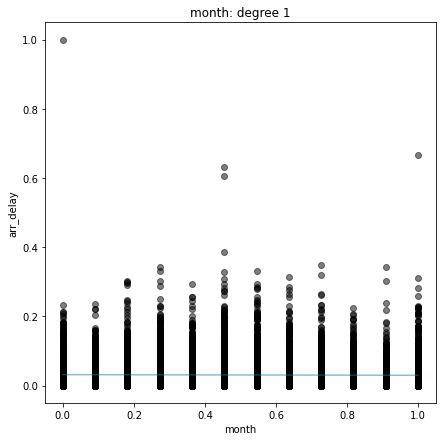

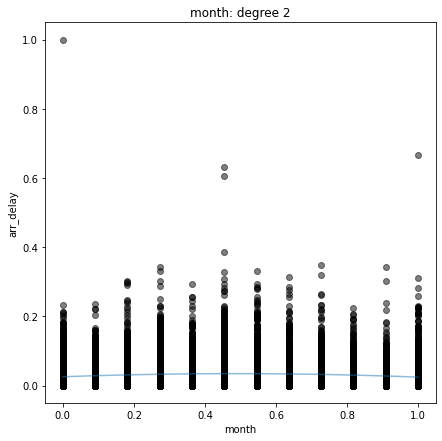

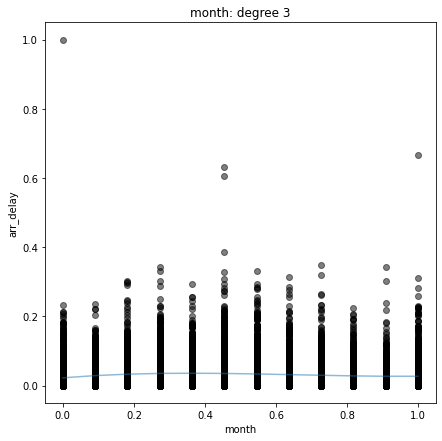

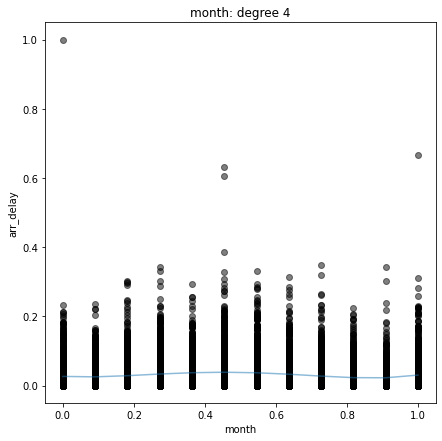

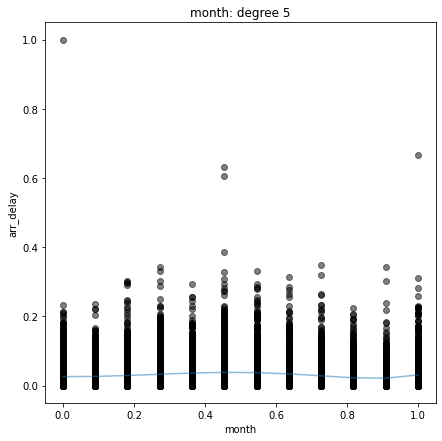

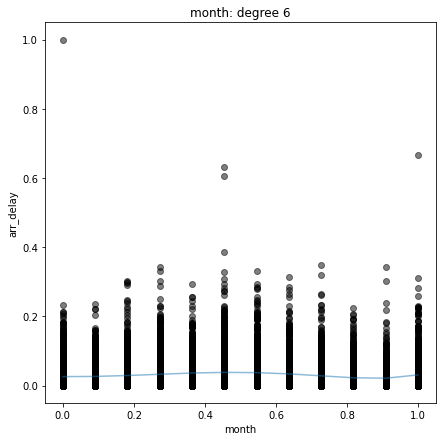

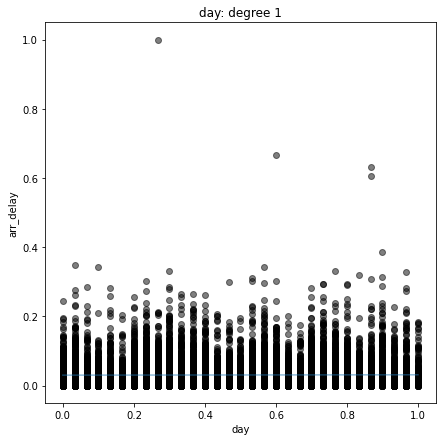

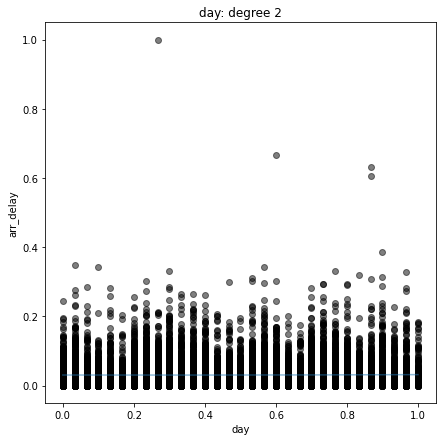

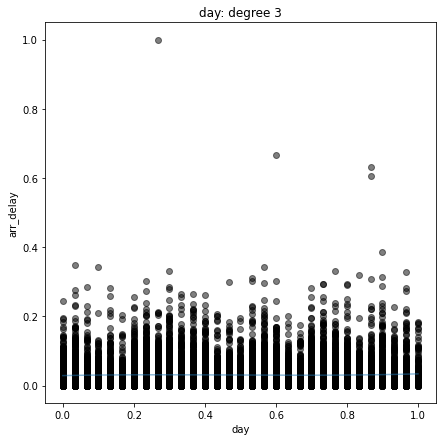

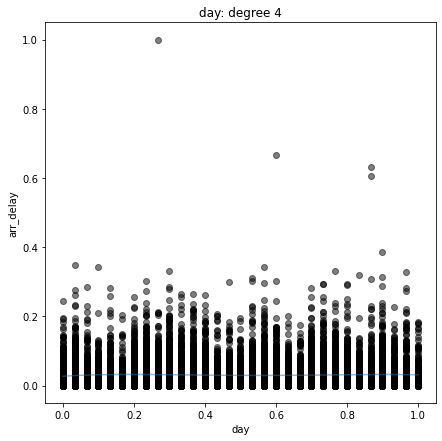

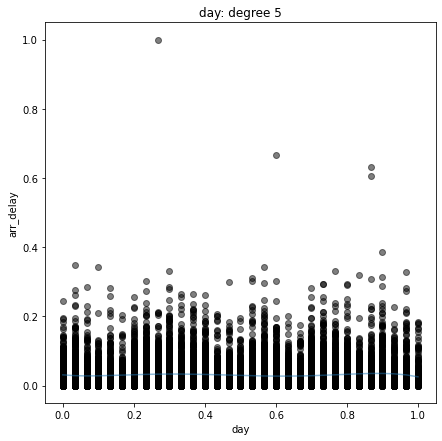

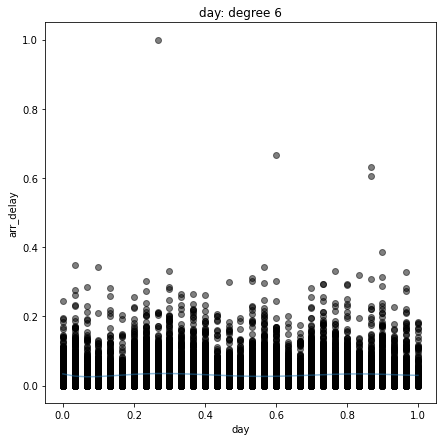

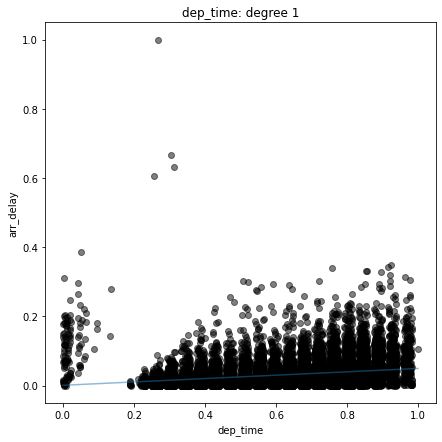

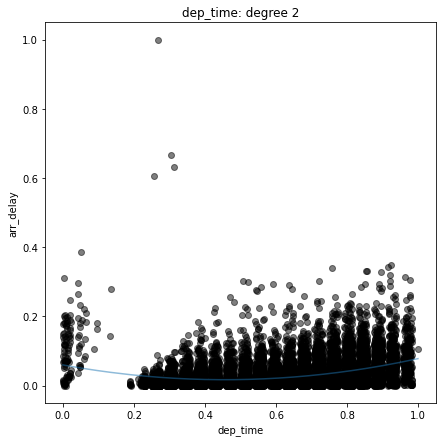

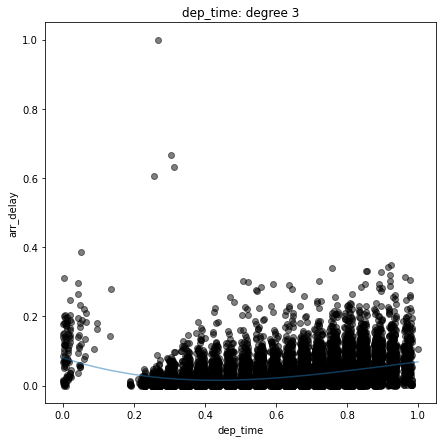

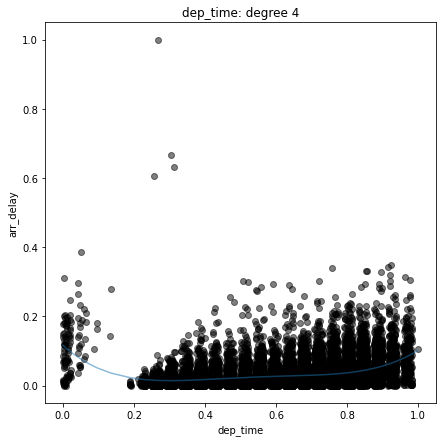

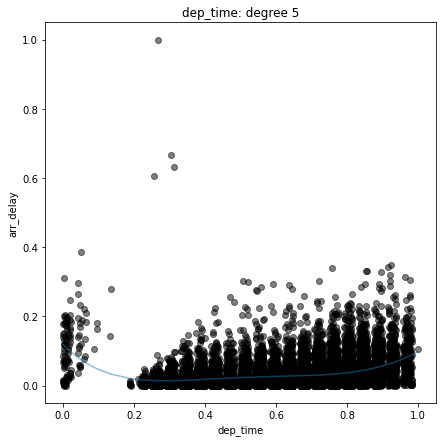

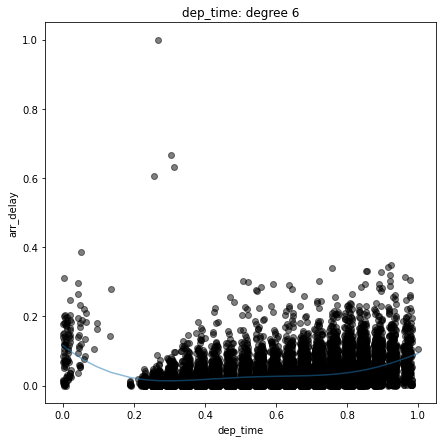

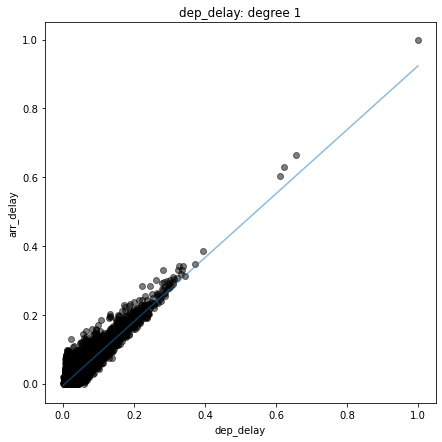

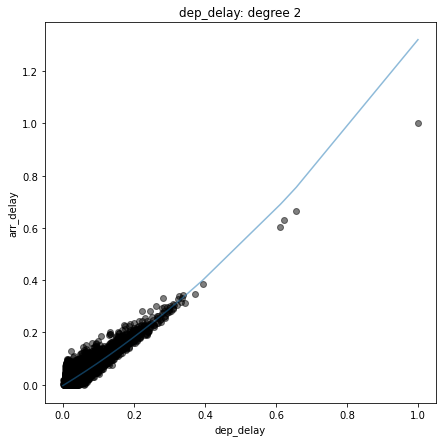

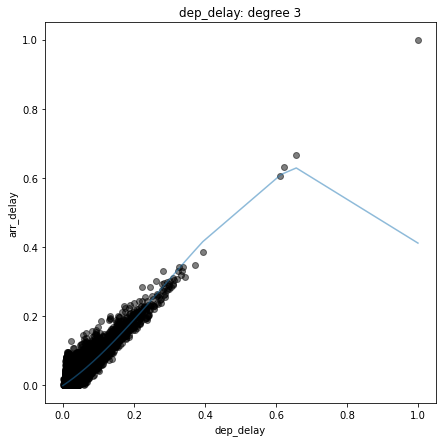

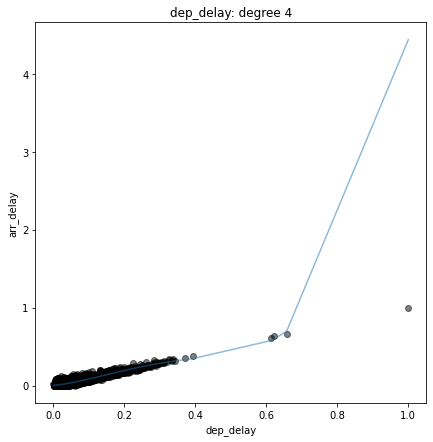

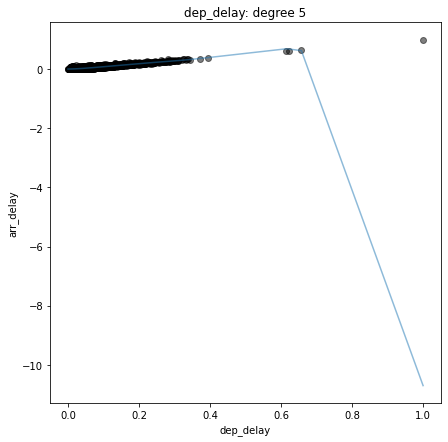

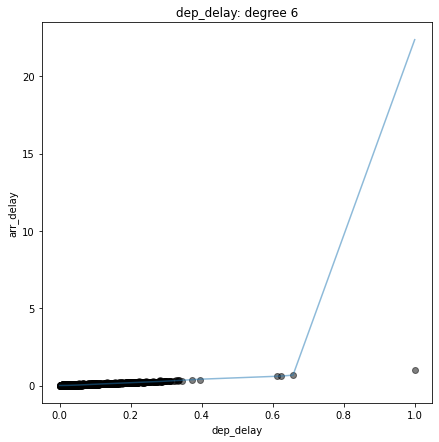

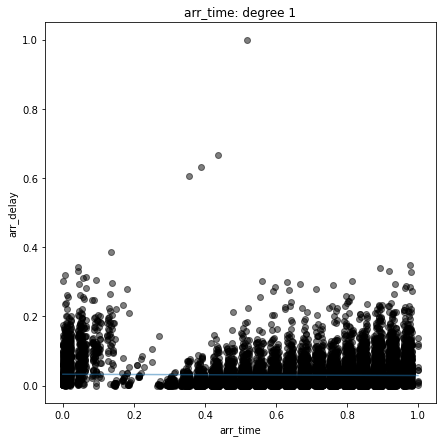

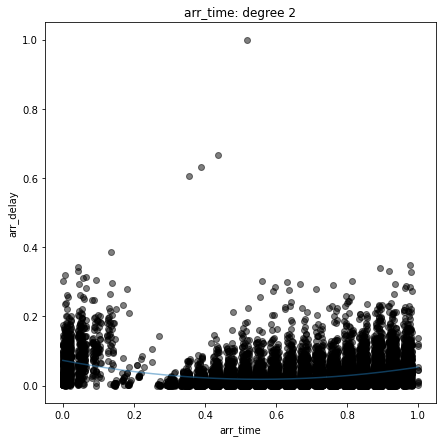

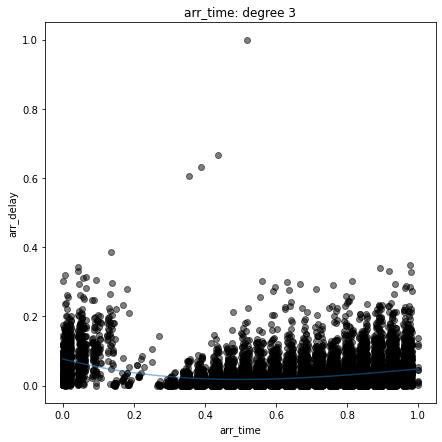

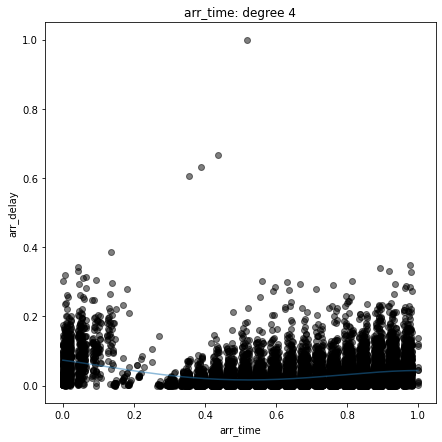

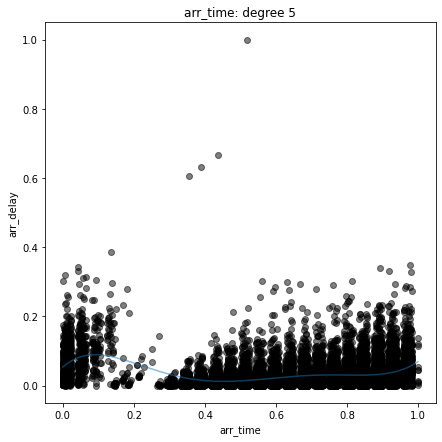

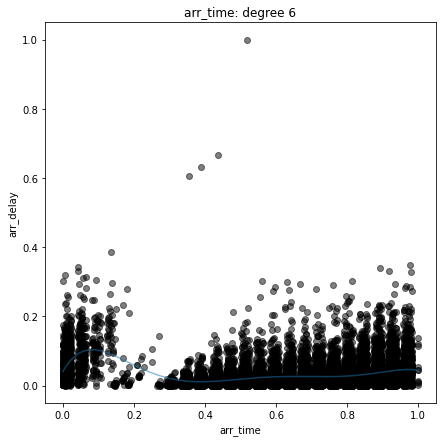

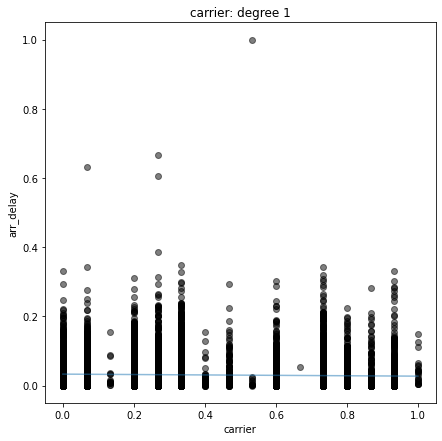

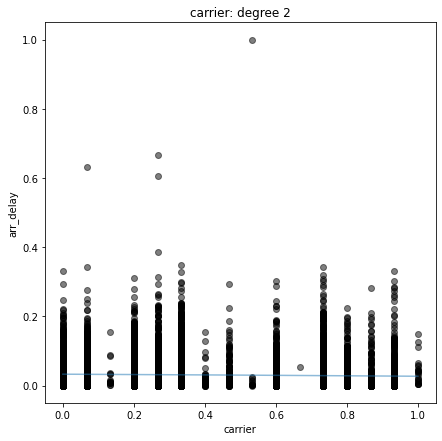

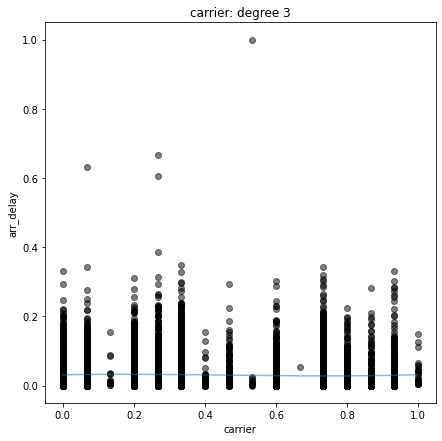

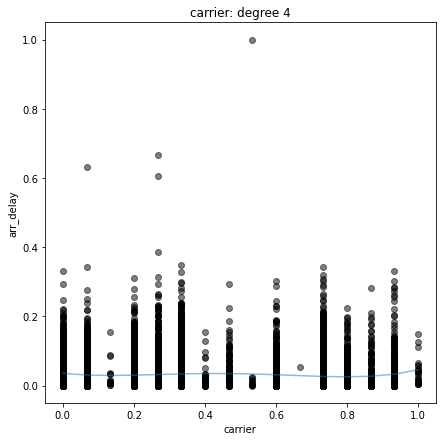

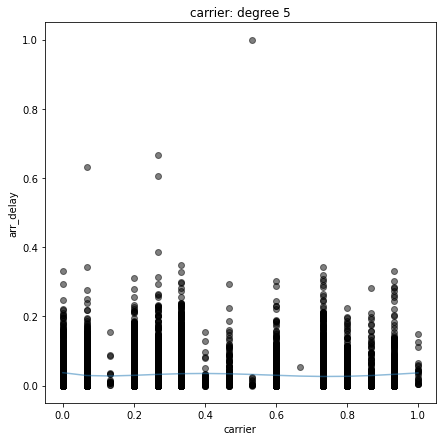

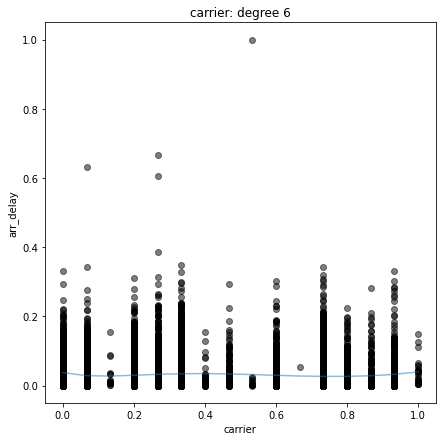

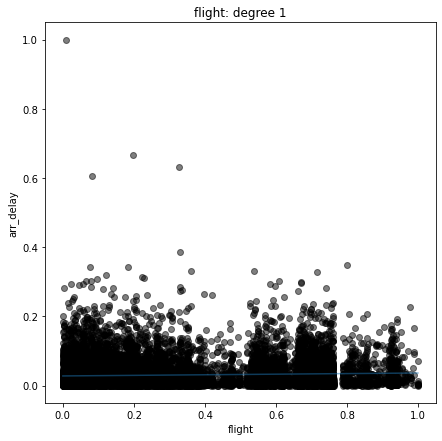

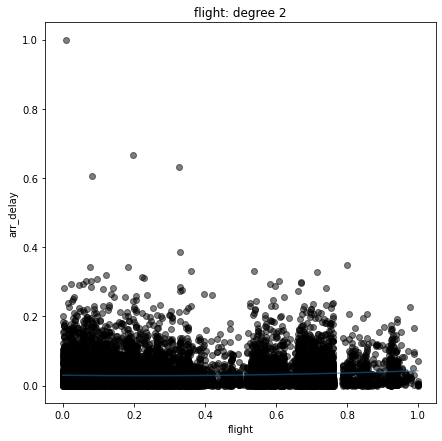

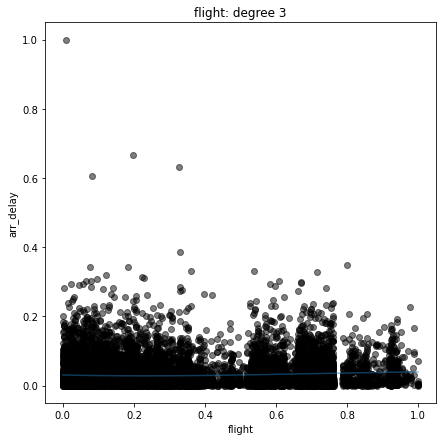

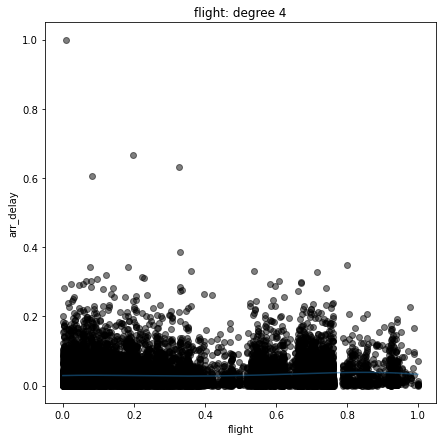

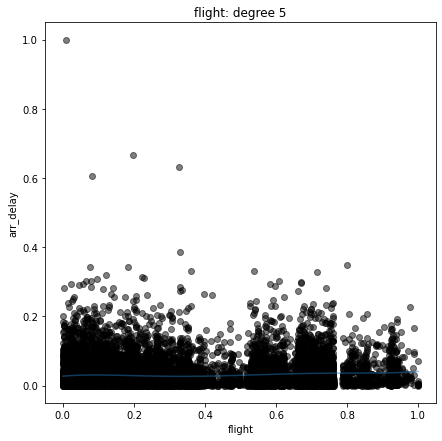

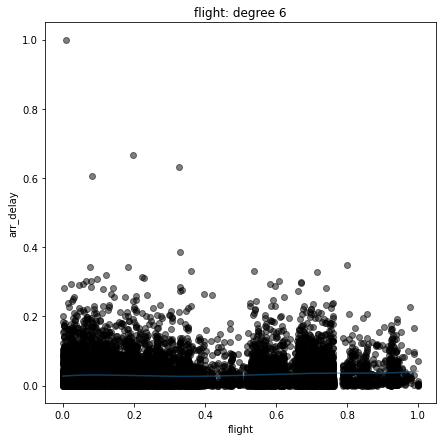

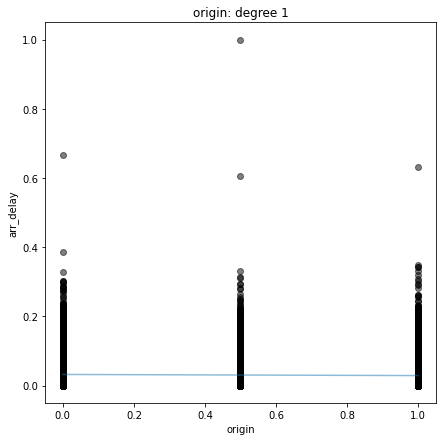

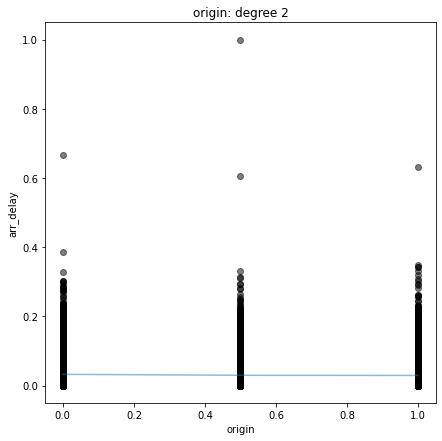

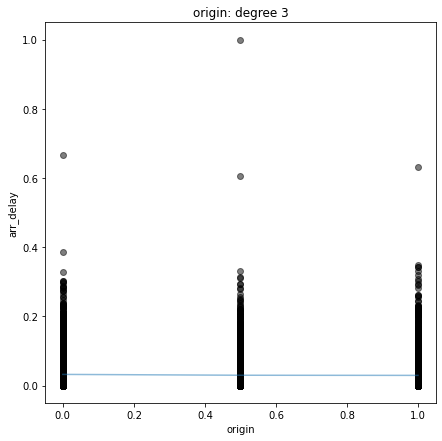

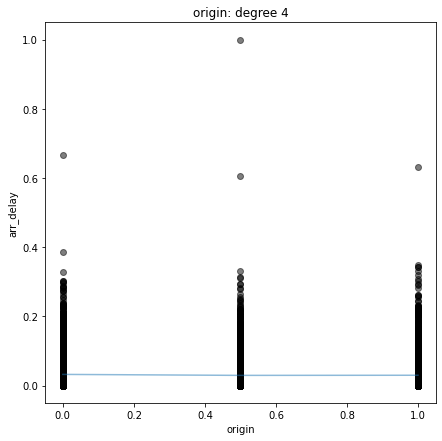

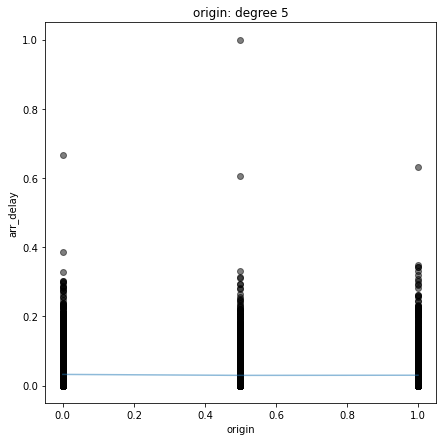

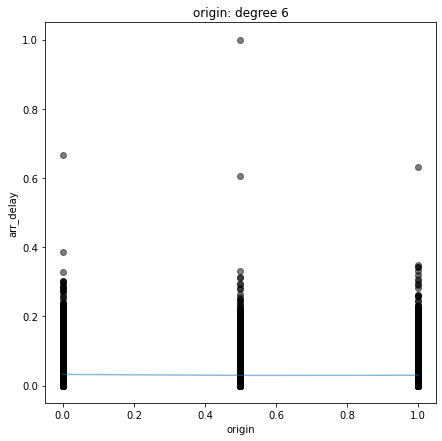

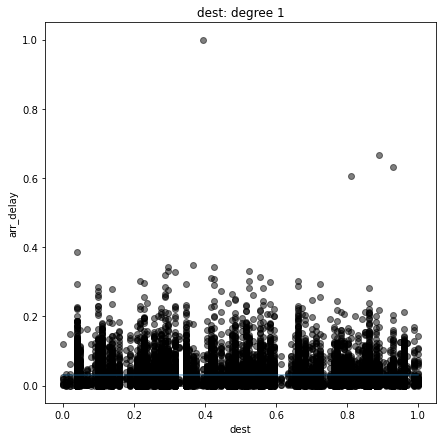

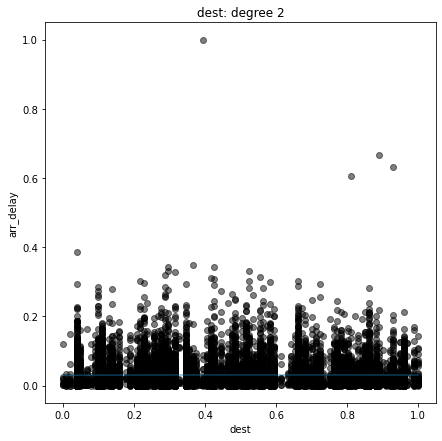

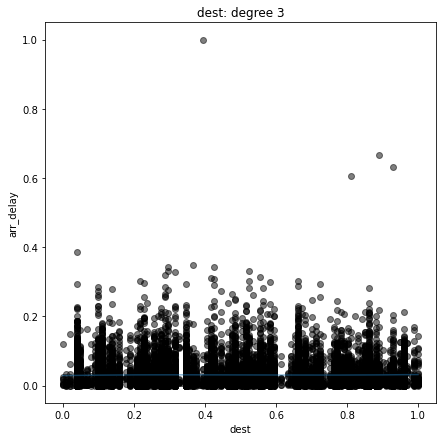

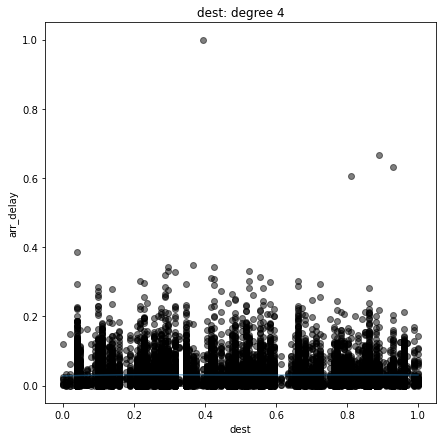

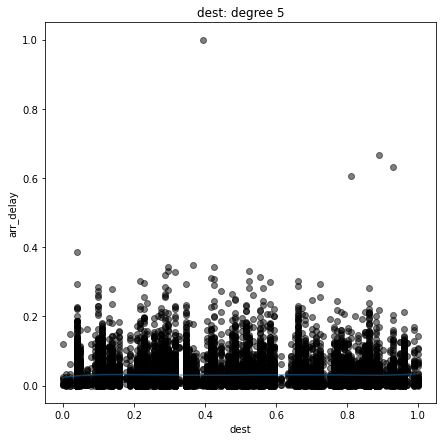

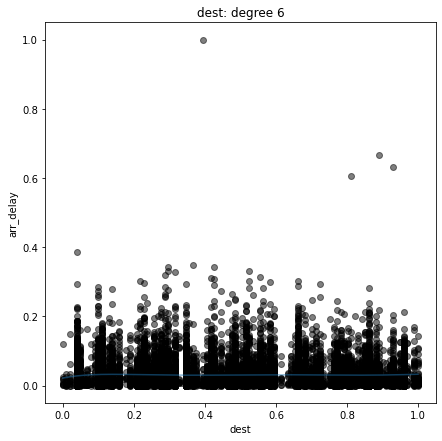

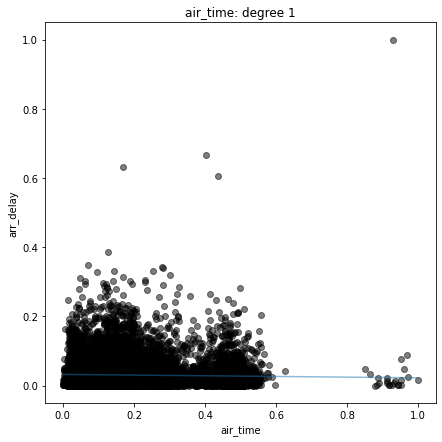

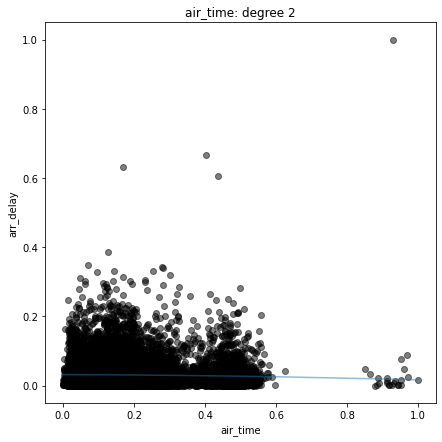

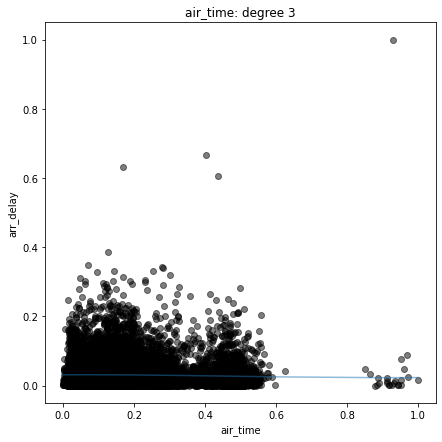

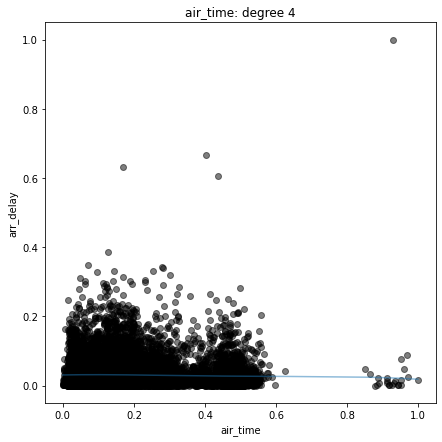

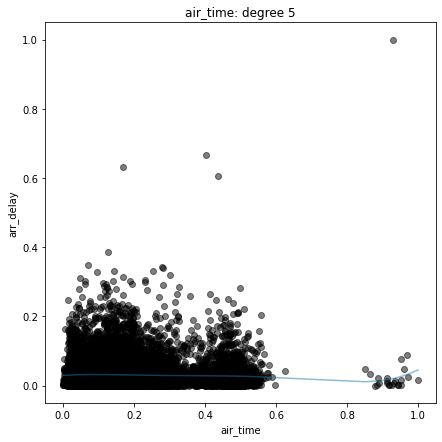

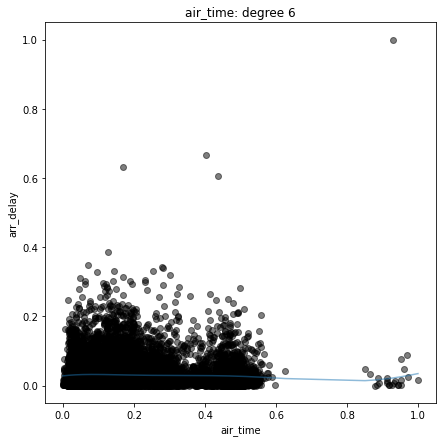

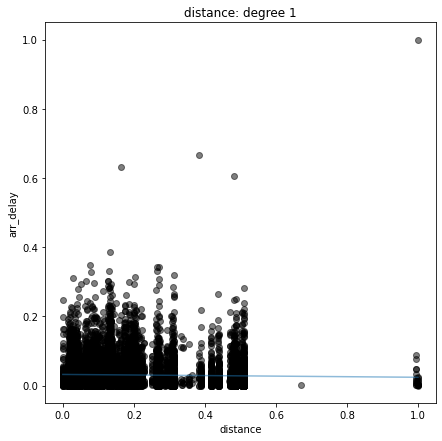

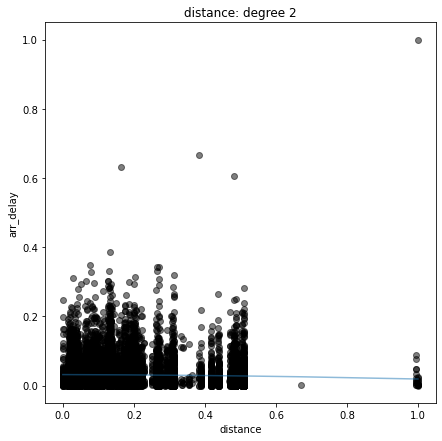

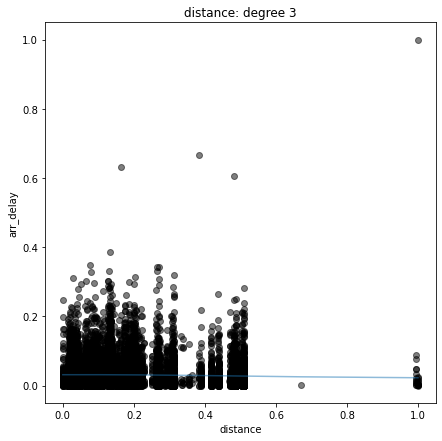

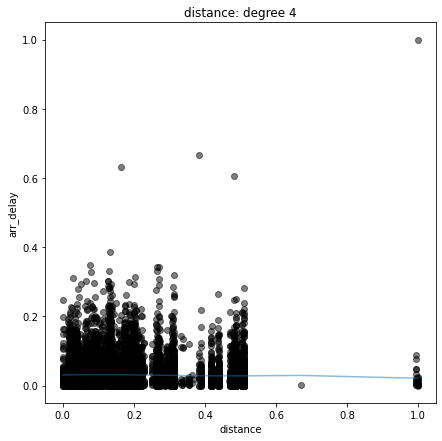

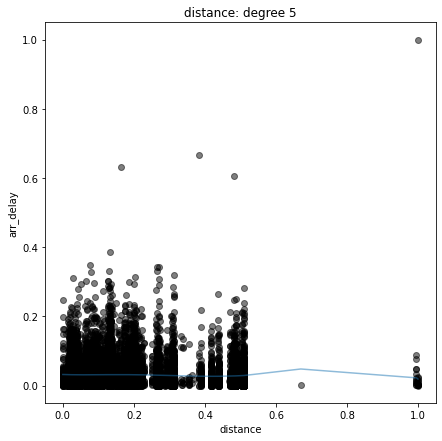

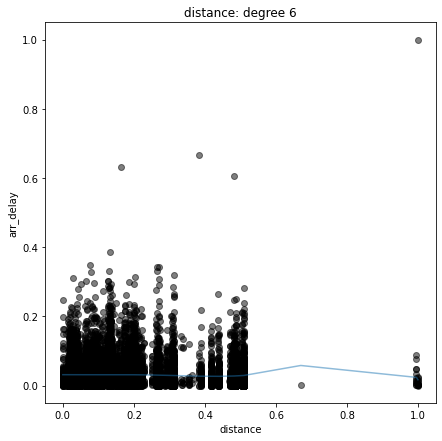

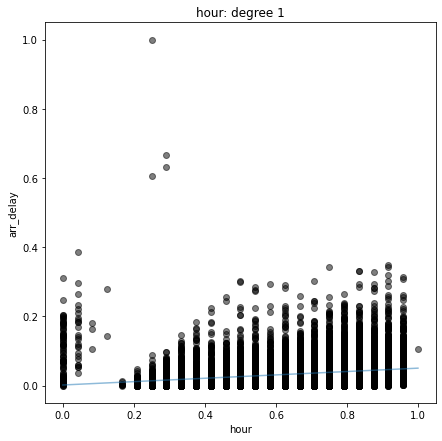

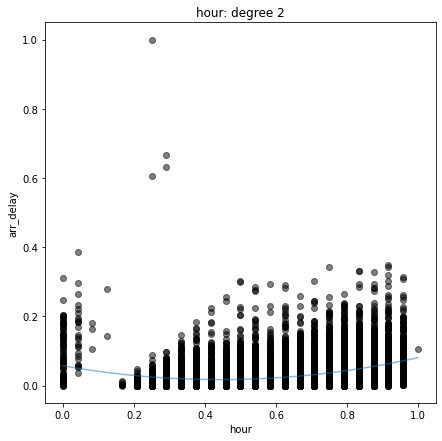

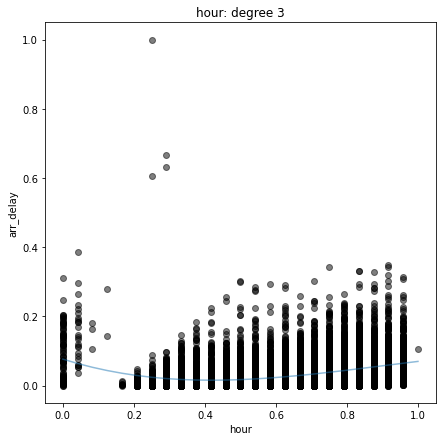

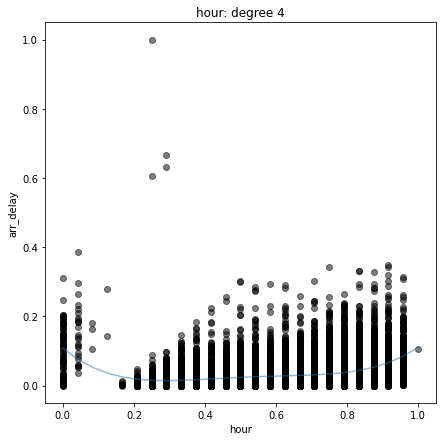

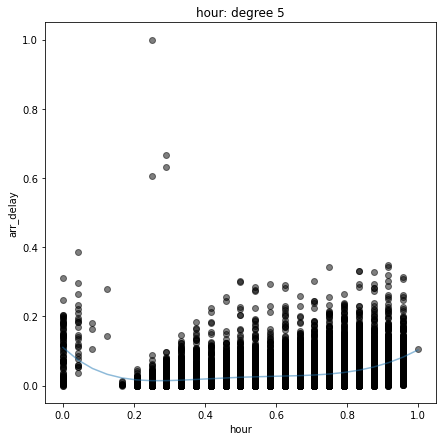

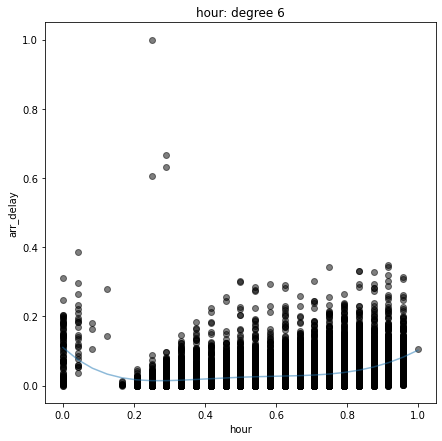

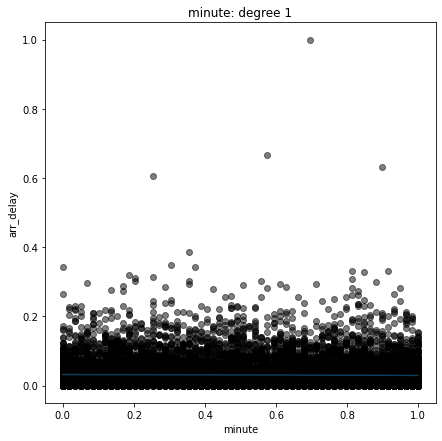

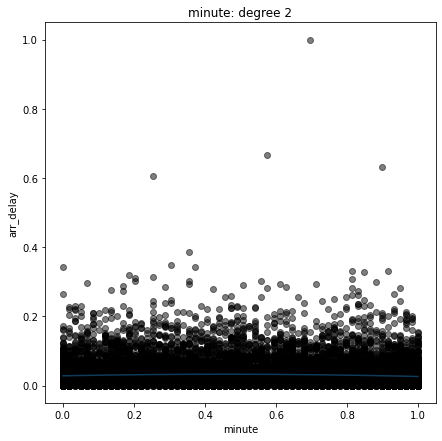

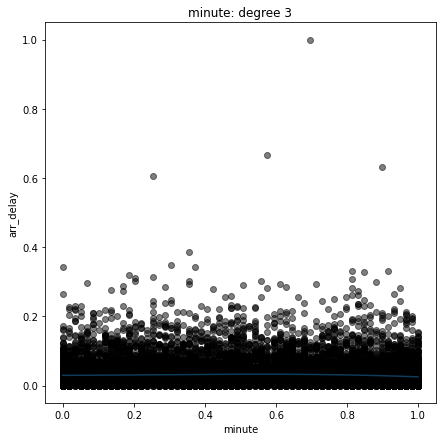

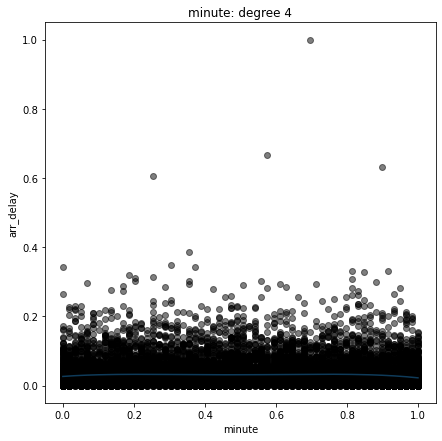

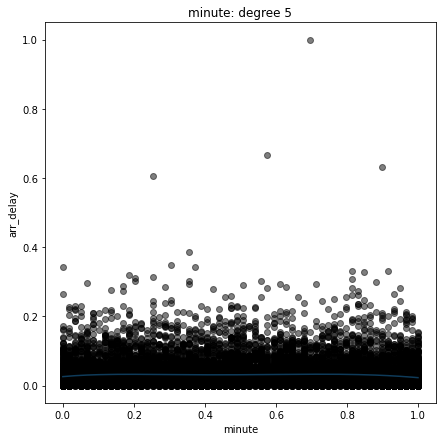

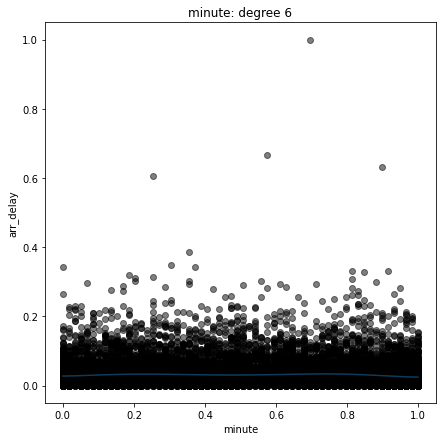

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
import numpy as np

df_altered = df.drop(columns = ["arr_delay"])

for i, column in enumerate(df_altered.columns):
    print(column)

    for deg in range(1, 7):
        poly = PolynomialFeatures(degree=deg, include_bias=False)
        # learn from training data and memorize model coefficients
        x_train_poly = poly.fit_transform(np.asarray(X_train[:,i]).reshape(-1,1))

        polyReg = LinearRegression().fit(x_train_poly, np.asarray(y_train).reshape(-1, 1)) 

        y_train_predicted = polyReg.predict(x_train_poly)
        print(f'Training MSE error for degree {deg} is: {round(mean_squared_error(y_train_predicted, y_train),4)}')
        print(f'Training R2 score for degree {deg} is: {round(r2_score(y_train, y_train_predicted),4)}')

        # use testing set to get standardized data
        x_test_poly = poly.transform(np.asarray(X_test[:,i]).reshape(-1,1))
        y_test_predicted = polyReg.predict(x_test_poly)
        print(f'Testing MSE error for degree {deg} is: {round(mean_squared_error(y_test_predicted, y_test),4)}')
        print(f'Testing R2 score for degree {deg} is: {round(r2_score(y_test, y_test_predicted),4)}')

        print('\n')

        # Plotting
        X = np.asarray(X_scaled[:,i])
        y = y_scaled_array

        plt.figure(figsize=(7, 7))
        plt.scatter(X, y, color='k', alpha=.5)

        # sort the values of x before line plot
        sort_axis = operator.itemgetter(0)
        # put original X into the model to get standardized data
        fitted_X = poly.transform(np.asarray(X).reshape(-1,1))
        sorted_zip = sorted(zip(X, polyReg.predict(fitted_X)), key=sort_axis)
        x_, y_ = zip(*sorted_zip)
        plt.plot(x_, y_, color='tab:blue', alpha=.5)
        plt.title(column + ": degree " + str(deg))
        plt.xlabel(column)
        plt.ylabel("arr_delay")

### Deep Neural Network:

(11208, 13)
Testing MSE: 0.0002082180290017277 R^2 Score: 0.8879959082421275


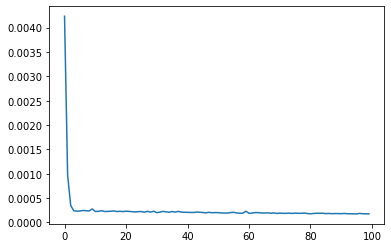

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(18, input_dim=13, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.005), metrics=[tf.keras.metrics.MeanSquaredError()])
print(X_train.shape)
history = model.fit(X_train, y_train,epochs=100, verbose=0)
model.predict(X_test)
model_pred = model.predict(X_test)
predictions = sc.inverse_transform(model_pred)
test = sc.inverse_transform(y_test)
testing_accuracy, testing_mse = model.evaluate(X_test, y_test, verbose=0)    
print("Testing MSE:", testing_mse, "R^2 Score:", r2_score(test, predictions, multioutput='variance_weighted'))
plt.plot(history.history['mean_squared_error'])

In [17]:
import numpy
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

def create_models(nodes1,nodes2,learn_rate):
        # Create model
    model = Sequential()
    model.add(Dense(nodes1, input_dim=13, activation='sigmoid'))
    model.add(Dense(nodes2, activation='sigmoid'))
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate)#learning_rate is 0.3
        # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_models, batch_size=10000, verbose=0)
learn_rate = [0.005, 0.01, 0.05, 0.1, 0.15, 0.3]
epochs = [100,500, 1000, 1500]
nodes1 = range(7, 20)
nodes2 = range(7,20)
param_grid = dict(learn_rate = learn_rate, epochs=epochs,nodes1=nodes1,nodes2=nodes2)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.036046 using {'nodes2': 15, 'nodes1': 18, 'learn_rate': 0.005, 'epochs': 100}


### SVM:

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C=8, epsilon=.05)
regressor.fit(X_train, y_train.ravel())
svr_predict = regressor.predict(X_test)
regressor.score(X_test, y_test.ravel())

0.6198674862071063

In [32]:
from sklearn.model_selection import RandomizedSearchCV
kernel = ['sigmoid', 'rbf', 'linear', 'poly']
C = range(2, 15)
epsilon = (0.05, 0.082, 0.1, 0.15, 0.175, 0.3)
param_grid = dict(kernel = kernel, C = C, epsilon=epsilon)
grid = RandomizedSearchCV(estimator=SVR(), param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.580847 using {'kernel': 'linear', 'epsilon': 0.05, 'C': 8}
-44893772.218749 (31845963.842181) with: {'kernel': 'sigmoid', 'epsilon': 0.175, 'C': 4}
-7.085375 (0.649729) with: {'kernel': 'rbf', 'epsilon': 0.15, 'C': 12}
-10.487600 (1.471153) with: {'kernel': 'poly', 'epsilon': 0.175, 'C': 12}
0.084148 (0.144773) with: {'kernel': 'linear', 'epsilon': 0.082, 'C': 14}
-0.726808 (0.119573) with: {'kernel': 'rbf', 'epsilon': 0.082, 'C': 13}
0.580847 (0.014091) with: {'kernel': 'linear', 'epsilon': 0.05, 'C': 8}
-6.146532 (0.966772) with: {'kernel': 'poly', 'epsilon': 0.15, 'C': 14}
-30.132253 (13.061169) with: {'kernel': 'linear', 'epsilon': 0.3, 'C': 4}
-11.075056 (0.931208) with: {'kernel': 'rbf', 'epsilon': 0.175, 'C': 3}
-11.075056 (0.931208) with: {'kernel': 'rbf', 'epsilon': 0.175, 'C': 14}


Text(0, 0.5, 'actual arrival delay')

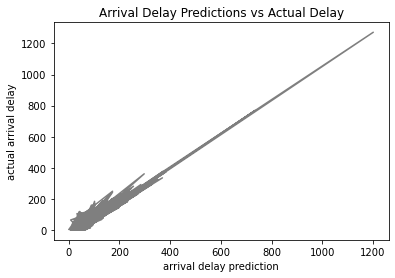

In [12]:
import matplotlib.pyplot as plt
X = sc.inverse_transform(svr_predict.reshape(-1,1))
test = sc.inverse_transform(y_test)
#plt.figure(figsize=(7, 7))
plt.plot(X, test, color='k', alpha=.5)
plt.title("Arrival Delay Predictions vs Actual Delay")
plt.xlabel("arrival delay prediction")
plt.ylabel("actual arrival delay")